In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import folium

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-colorblind')
plt.rc('axes', grid=True)
plt.rc('savefig', format='png', facecolor='None')

In [2]:
# load pickle into data frame
with open("../data/SFR/hpi_base.pkl","rb") as f:
    hpi_base = pickle.load(f)

In [3]:
hpi_base

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
0,2007-01-01,2007-01-31,1.0,0.000000,100.000000,00000,11460
1,2007-02-01,2007-02-28,2.0,-0.018513,98.165768,00000,11460
2,2007-03-01,2007-03-31,3.0,-0.016101,98.402746,00000,11460
3,2007-04-01,2007-04-30,4.0,-0.014683,98.542442,00000,11460
4,2007-05-01,2007-05-31,5.0,-0.049284,95.191042,00000,11460
...,...,...,...,...,...,...,...
2289502,2023-04-01,2023-04-30,196.0,0.228538,122.365511,22401,47900
2289503,2023-05-01,2023-05-31,197.0,0.233421,123.226434,22401,47900
2289504,2023-06-01,2023-06-30,198.0,0.237619,124.273514,22401,47900
2289505,2023-07-01,2023-07-31,199.0,0.288143,126.312831,22401,47900


In [4]:
# filter by Cleveland
hpi_cle = hpi_base.loc[hpi_base['census_cbsa_geoid'] == '17460']
print(f'hpi_cle has {hpi_cle.shape[0]} observations')
print(f'hpi_cle has {len(hpi_cle.census_zcta5_geoid.unique())} unique zip codes')
hpi_cle

hpi_cle has 23800 observations
hpi_cle has 119 unique zip codes


,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
444313,2007-01-01,2007-01-31,1.0,0.000000,100.000000,00000,17460
444314,2007-02-01,2007-02-28,2.0,-0.017367,98.278284,00000,17460
444315,2007-03-01,2007-03-31,3.0,-0.016022,98.410571,00000,17460
444316,2007-04-01,2007-04-30,4.0,-0.019141,98.104117,00000,17460
444317,2007-05-01,2007-05-31,5.0,-0.028715,97.169367,00000,17460
...,...,...,...,...,...,...,...
468108,2023-04-01,2023-04-30,196.0,0.375234,137.433795,44233,17460
468109,2023-05-01,2023-05-31,197.0,0.381455,139.363843,44233,17460
468110,2023-06-01,2023-06-30,198.0,0.364218,140.353555,44233,17460
468111,2023-07-01,2023-07-31,199.0,0.427763,143.767832,44233,17460


In [5]:
hpi_cle.describe()

,trans_period,coef,price_index
count,23800.000000,23800.000000,23800.000000
mean,100.500000,-0.121118,90.049133
std,57.735518,0.207145,19.464606
min,1.000000,-0.498368,65.424233
25%,50.750000,-0.283165,75.464223
50%,100.500000,-0.175380,83.688074
75%,150.250000,-0.010282,98.317358
max,200.000000,0.481145,156.913777


In [6]:
hpi_cle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23800 entries, 444313 to 468112
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period_start        23800 non-null  datetime64[ns]
 1   period_end          23800 non-null  datetime64[ns]
 2   trans_period        23800 non-null  float64       
 3   coef                23800 non-null  float64       
 4   price_index         23800 non-null  float64       
 5   census_zcta5_geoid  23800 non-null  object        
 6   census_cbsa_geoid   23800 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 1.5+ MB


In [7]:
# check that all periods have a value for each zip code
hpi_cle.groupby(by='trans_period').count().sort_values(by='period_start')

,period_start,period_end,coef,price_index,census_zcta5_geoid,census_cbsa_geoid
trans_period,,,,,,
1.0,119,119,119,119,119,119
128.0,119,119,119,119,119,119
129.0,119,119,119,119,119,119
130.0,119,119,119,119,119,119
131.0,119,119,119,119,119,119
...,...,...,...,...,...,...
71.0,119,119,119,119,119,119
72.0,119,119,119,119,119,119
73.0,119,119,119,119,119,119


In [8]:
hpi_cle['category'] = hpi_cle['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')

/var/folders/3z/d_msg6bj2ksf6j2jt9jvn0h80000gn/T/ipykernel_76634/2690201010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi_cle['category'] = hpi_cle['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')


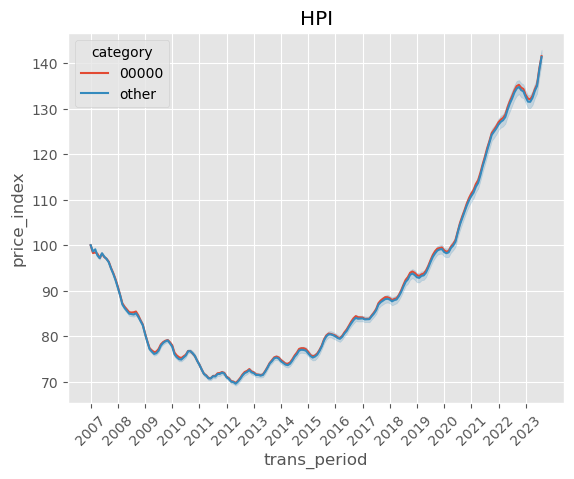

In [9]:
sns.lineplot(data=hpi_cle, x='trans_period', y='price_index', hue='category')
plt.xticks(ticks = range(1,200,12), labels = range(2007,2024), rotation=45)
plt.title('HPI')
plt.show()

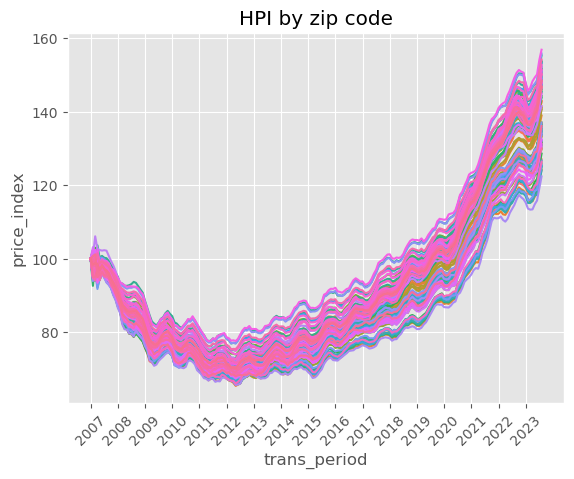

In [10]:
sns.lineplot(data=hpi_cle, x='trans_period', y='price_index', hue='census_zcta5_geoid', legend=False)
plt.xticks(ticks = range(1,200,12), labels = range(2007,2024), rotation=45)
plt.title('HPI by zip code')
plt.show()

In [11]:
# top 20 hpi zip codes as of 2023-08-01
hpi_cle.loc[hpi_cle.trans_period == 200].sort_values(by='price_index', ascending=False).head(20)

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid,category
465112,2023-08-01,2023-08-31,200.0,0.452008,156.913777,44251,17460,other
461712,2023-08-01,2023-08-31,200.0,0.455738,155.879649,44217,17460,other
455112,2023-08-01,2023-08-31,200.0,0.457436,155.375407,44270,17460,other
467112,2023-08-01,2023-08-31,200.0,0.440290,154.244868,44273,17460,other
455712,2023-08-01,2023-08-31,200.0,0.440788,153.796027,44215,17460,other
445312,2023-08-01,2023-08-31,200.0,0.466624,153.544363,44145,17460,other
453712,2023-08-01,2023-08-31,200.0,0.473900,153.532267,44126,17460,other
460512,2023-08-01,2023-08-31,200.0,0.442050,153.277913,44214,17460,other
465712,2023-08-01,2023-08-31,200.0,0.442143,152.792190,44287,17460,other
458112,2023-08-01,2023-08-31,200.0,0.455003,152.363613,44138,17460,other


In [12]:
# bottom 20 hpi zip codes as of 2023-08-01
hpi_cle.loc[hpi_cle.trans_period == 200].sort_values(by='price_index').head(20)

,period_start,period_end,trans_period,coef,price_index,census_zcta5_geoid,census_cbsa_geoid,category
462512,2023-08-01,2023-08-31,200.0,0.241322,122.402966,44110,17460,other
457312,2023-08-01,2023-08-31,200.0,0.240242,124.031281,44108,17460,other
446312,2023-08-01,2023-08-31,200.0,0.262093,124.298721,44117,17460,other
453912,2023-08-01,2023-08-31,200.0,0.263297,125.020285,44112,17460,other
459912,2023-08-01,2023-08-31,200.0,0.270429,125.323973,44092,17460,other
454112,2023-08-01,2023-08-31,200.0,0.269405,125.330329,44132,17460,other
461312,2023-08-01,2023-08-31,200.0,0.266085,125.676647,44106,17460,other
449712,2023-08-01,2023-08-31,200.0,0.274245,125.972323,44119,17460,other
466512,2023-08-01,2023-08-31,200.0,0.279830,126.448033,44123,17460,other
459512,2023-08-01,2023-08-31,200.0,0.280955,126.724463,44143,17460,other


In [13]:
# list of unique CLE zip codes in HPI
hpi_cle_zips = hpi_cle.census_zcta5_geoid.unique().tolist()

In [14]:
# load pickle into data frame
with open("../data/SFR/rpi_index.pkl","rb") as f:
    rpi_index = pickle.load(f)

In [15]:
rpi_index

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid
0,2010-02-01,100.000000,17140,00000
1,2010-03-01,74.931176,17140,00000
2,2010-04-01,79.105472,17140,00000
3,2010-05-01,70.164398,17140,00000
4,2010-06-01,54.594201,17140,00000
...,...,...,...,...
1684303,2023-04-01,184.647349,49180,27105
1684304,2023-05-01,186.259023,49180,27105
1684305,2023-06-01,187.066471,49180,27105
1684306,2023-07-01,186.997432,49180,27105


In [16]:
# filter by Cleveland
rpi_cle = rpi_index.loc[rpi_index['census_cbsa_geoid'] == '17460']
print(f'rpi_cle has {rpi_cle.shape[0]} observations')
print(f'rpi_cle has {len(rpi_cle.census_zcta5_geoid.unique())} unique zip codes')
rpi_cle

rpi_cle has 19516 observations
rpi_cle has 119 unique zip codes


,date,rental_index,census_cbsa_geoid,census_zcta5_geoid
1534518,2010-01-01,100.000000,17460,00000
1534519,2010-02-01,96.506729,17460,00000
1534520,2010-03-01,105.521281,17460,00000
1534521,2010-04-01,100.533446,17460,00000
1534522,2010-05-01,112.557932,17460,00000
...,...,...,...,...
1554029,2023-04-01,169.060203,17460,44233
1554030,2023-05-01,170.282868,17460,44233
1554031,2023-06-01,170.094576,17460,44233
1554032,2023-07-01,171.566351,17460,44233


In [17]:
rpi_cle.describe()

,rental_index
count,19516.000000
mean,124.868535
std,19.576404
min,92.341183
25%,110.013802
50%,119.208038
75%,134.436693
max,210.248667


In [18]:
rpi_cle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19516 entries, 1534518 to 1554033
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                19516 non-null  datetime64[ns]
 1   rental_index        19516 non-null  float64       
 2   census_cbsa_geoid   19516 non-null  object        
 3   census_zcta5_geoid  19516 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 762.3+ KB


In [19]:
# check for completeness of data
rpi_cle.groupby(by='date').count().sort_values(by='date')

,rental_index,census_cbsa_geoid,census_zcta5_geoid
date,,,
2010-01-01,119,119,119
2010-02-01,119,119,119
2010-03-01,119,119,119
2010-04-01,119,119,119
2010-05-01,119,119,119
...,...,...,...
2023-04-01,119,119,119
2023-05-01,119,119,119
2023-06-01,119,119,119


In [20]:
rpi_cle['category'] = rpi_cle['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')

/var/folders/3z/d_msg6bj2ksf6j2jt9jvn0h80000gn/T/ipykernel_76634/238447773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpi_cle['category'] = rpi_cle['census_zcta5_geoid'].apply(lambda x: x if x == '00000' else 'other')


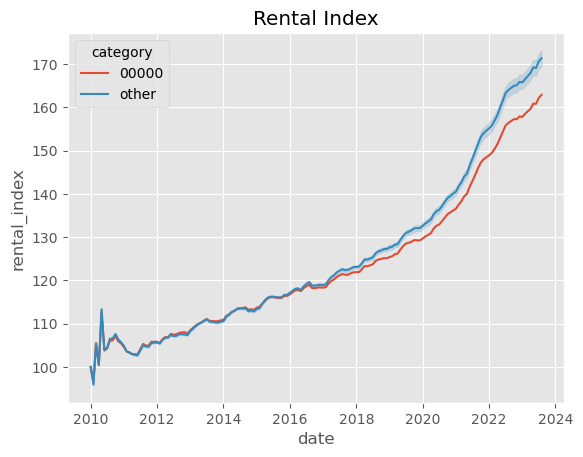

In [21]:
sns.lineplot(data=rpi_cle, x='date', y='rental_index', hue='category')
plt.title('Rental Index')
plt.show()

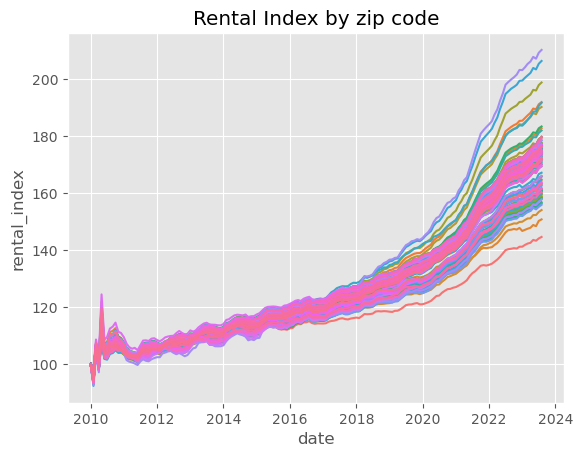

In [22]:
sns.lineplot(data=rpi_cle, x='date', y='rental_index', hue='census_zcta5_geoid', legend=False)
plt.title('Rental Index by zip code')
plt.show()

In [23]:
# top 20 rpi zip codes as of 2023-08-01
rpi_cle.loc[rpi_cle.date == '2023-08-01'].sort_values(by='rental_index', ascending=False).head(20)

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid,category
1549277,2023-08-01,210.248667,17460,44105,other
1547145,2023-08-01,206.375572,17460,44137,other
1539273,2023-08-01,198.822539,17460,44146,other
1535993,2023-08-01,191.936670,17460,44141,other
1546489,2023-08-01,191.680813,17460,44035,other
1538453,2023-08-01,190.233916,17460,44131,other
1542061,2023-08-01,183.387887,17460,44147,other
1536321,2023-08-01,182.764339,17460,44202,other
1544849,2023-08-01,181.981910,17460,44139,other
1536813,2023-08-01,179.831535,17460,44055,other


In [24]:
# bottom 20 rpi zip codes as of 2023-08-01
rpi_cle.loc[rpi_cle.date == '2023-08-01'].sort_values(by='rental_index').head(20)

,date,rental_index,census_cbsa_geoid,census_zcta5_geoid,category
1535173,2023-08-01,144.621287,17460,44121,other
1536485,2023-08-01,150.783316,17460,44113,other
1536977,2023-08-01,154.052523,17460,44094,other
1548457,2023-08-01,155.906203,17460,44106,other
1545177,2023-08-01,156.373256,17460,44108,other
1542389,2023-08-01,156.799020,17460,44112,other
1549441,2023-08-01,157.732379,17460,44110,other
1547309,2023-08-01,157.935337,17460,44092,other
1536157,2023-08-01,158.281089,17460,44117,other
1542553,2023-08-01,158.328043,17460,44132,other


In [69]:
# list of unique CLE zip codes in RPI
rpi_cle_zips = rpi_cle.census_zcta5_geoid.unique().tolist()

In [26]:
# check to see if unique Cleveland zips are the same for HPI and RPI
print(list(set(rpi_cle_zips) - set(hpi_cle_zips)))
print(list(set(hpi_cle_zips) - set(rpi_cle_zips)))

[]
[]


# CBSA

In [50]:
cbsa = pd.read_csv('../data/census_cbsa_zip_tract.csv', index_col = 0)
# convert zip code to string
cbsa['census_zcta5_geoid'] = cbsa['census_zcta5_geoid'].astype(str)
cbsa

,census_cbsa_geoid,census_cbsa_name,census_cbsa_lsad,census_cbsa_lat,census_cbsa_lon,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon,census_tract_geoid,census_tract_lat,census_tract_lon
0,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953800,41.245562,-86.539415
1,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953900,41.223357,-86.626671
2,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149954000,41.288932,-86.621202
3,NaN,NaN,NaN,NaN,NaN,46534,41.285345,-86.617818,18149953700,41.349693,-86.591977
4,21780.0,"Evansville, IN-KY",M1,38.020070,-87.586166,47660,38.296067,-87.328127,18051050300,38.280515,-87.379887
...,...,...,...,...,...,...,...,...,...,...,...
93688,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37849,36.054050,-84.048488,47093006301,36.126851,-83.982097
93689,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37849,36.054050,-84.048488,47093006104,36.036152,-84.028267
93690,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37754,36.139099,-84.029801,47093006102,36.075827,-84.043041
93691,28940.0,"Knoxville, TN",M1,36.014791,-84.206701,37806,36.084693,-83.727987,47093006502,36.084693,-83.727987


In [51]:
cbsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93693 entries, 0 to 93692
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   census_cbsa_geoid   89550 non-null  float64
 1   census_cbsa_name    89550 non-null  object 
 2   census_cbsa_lsad    89550 non-null  object 
 3   census_cbsa_lat     89550 non-null  float64
 4   census_cbsa_lon     89550 non-null  float64
 5   census_zcta5_geoid  93693 non-null  object 
 6   census_zcta5_lat    93693 non-null  float64
 7   census_zcta5_lon    93693 non-null  float64
 8   census_tract_geoid  93693 non-null  int64  
 9   census_tract_lat    93693 non-null  float64
 10  census_tract_lon    93693 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.6+ MB


In [52]:
# subset for CLE
cbsa_cle = cbsa.loc[cbsa['census_cbsa_geoid'] == 17460]
cbsa_cle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 23659 to 27478
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   census_cbsa_geoid   668 non-null    float64
 1   census_cbsa_name    668 non-null    object 
 2   census_cbsa_lsad    668 non-null    object 
 3   census_cbsa_lat     668 non-null    float64
 4   census_cbsa_lon     668 non-null    float64
 5   census_zcta5_geoid  668 non-null    object 
 6   census_zcta5_lat    668 non-null    float64
 7   census_zcta5_lon    668 non-null    float64
 8   census_tract_geoid  668 non-null    int64  
 9   census_tract_lat    668 non-null    float64
 10  census_tract_lon    668 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 62.6+ KB


In [53]:
# unique cbsa zip codes in 17460
len(cbsa_cle.census_zcta5_geoid.unique())

112

In [54]:
# subset and remove unecessary fields
cbsa_cle = cbsa_cle[['census_cbsa_geoid', 'census_cbsa_name', 'census_zcta5_geoid', 'census_zcta5_lat', 'census_zcta5_lon']].drop_duplicates().sort_values(by='census_zcta5_geoid')
cbsa_cle

,census_cbsa_geoid,census_cbsa_name,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon
26507,17460.0,"Cleveland-Elyria, OH",44001,41.366331,-82.259924
26188,17460.0,"Cleveland-Elyria, OH",44011,41.445100,-82.005109
25980,17460.0,"Cleveland-Elyria, OH",44012,41.497270,-82.017462
26664,17460.0,"Cleveland-Elyria, OH",44017,41.370548,-81.861756
26616,17460.0,"Cleveland-Elyria, OH",44021,41.443260,-81.144465
...,...,...,...,...,...
24442,17460.0,"Cleveland-Elyria, OH",44491,41.369969,-80.963650
23975,17460.0,"Cleveland-Elyria, OH",44851,41.109176,-82.391571
23760,17460.0,"Cleveland-Elyria, OH",44859,41.021963,-82.330724
25215,17460.0,"Cleveland-Elyria, OH",44880,41.033472,-82.218901


In [55]:
# list of cbsa CLE zip codes
cbsa_cle_zips = cbsa_cle.census_zcta5_geoid.unique()

In [56]:
# which zip codes are in HPI, but missing from CBSA?
print(list(set(hpi_cle_zips) - set(cbsa_cle_zips)))

['44215', '00000', '44235', '44101', '44049', '44045', '44080']


Multi-Family Data

In [34]:
mf_occ = pd.read_csv("../data/MFR/haystacks_occfile_7-26-2023.csv")
mf_rent = pd.read_csv("../data/MFR/haystacks_rent_7-17-2023.csv")
mf_prop = pd.read_csv("../data/PropertyFileAugust2023.csv")

# convert zip code to string
mf_prop['zipcode'] = mf_prop['zipcode'].astype(str)

In [35]:
mf_occ

,PID,Period,Occupancy
0,96_872,01/01/2015,97.9
1,96_872,02/01/2015,97.9
2,96_872,03/01/2015,97.7
3,96_872,04/01/2015,97.7
4,96_872,05/01/2015,97.7
...,...,...,...
5612304,197_1397388,02/01/2023,92.4
5612305,197_1397388,03/01/2023,92.4
5612306,197_1397388,04/01/2023,93.1
5612307,197_1397388,05/01/2023,93.1


In [36]:
mf_rent

,PID,UnitType,Period,Rent
0,1_1004,1BR,2015-01-01,473.0
1,1_1004,1BR,2015-02-01,475.0
2,1_1004,1BR,2015-03-01,474.0
3,1_1004,1BR,2015-04-01,473.0
4,1_1004,1BR,2015-05-01,472.0
...,...,...,...,...
15181753,99_97,2BR/1Bath,2023-02-01,1110.0
15181754,99_97,2BR/1Bath,2023-03-01,1108.0
15181755,99_97,2BR/1Bath,2023-04-01,1106.0
15181756,99_97,2BR/1Bath,2023-05-01,1104.0


In [37]:
mf_prop

,Market,Submarket,PID,propertyname,addressall,city,state,zipcode,Longitude,Latitude,nounits,completedyear,propertyquality,locationquality,website,ControlledAccess,FitnessCenter,businesscenter,clubhouse,coveredparking,TotalParkingSpaces,parkingtype,RentOffice,mediaroom,minstories,maxstories,ElevatorServed,wdhookup,wdinunit,SiteSizeAcres,NumberBuildings,county,ParcelComplete,mixeduse,OccupancyDate,Occupancy
0,Albany,1 - Central Albany,151_1100730,Abraxas at 90 State,90 State Street,Albany,NY,12207,-73.753301,42.649623,162,2024.0,NaN,B-,https://www.abraxasat90state.com,Yes,Yes,Yes,Yes,NaN,0.0,None,StandAlone,Y,15.0,15.0,Yes,None,All,0.38,1.0,Albany,010100-076-042-0001-005-000-0000,NaN,NaN,NaN
1,Albany,1 - Central Albany,151_1154,20 Park Residences,20 Park Street,Albany,NY,12207,-73.756933,42.650379,73,2016.0,B+,B-,NaN,Yes,Yes,No,Yes,NaN,28.0,Grade Level,StandAlone,N,5.0,5.0,Yes,None,All,0.44,1.0,Albany,76.33-1-12,No,2023-07-01,0.958904
2,Albany,1 - Central Albany,151_1171488,3rd Avenue & Elizabeth Street,3rd Avenue & Elizabeth Street,Albany,NY,12202,-73.761864,42.639730,100,NaN,NaN,C-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,NaN,NaN,NaN,NaN
3,Albany,1 - Central Albany,151_1179,"Gallery on Holland, The",25 Holland Avenue,Albany,NY,12209,-73.771652,42.646851,60,NaN,NaN,B-,NaN,NaN,Yes,NaN,Yes,NaN,59.0,Multi-Level Structure,NaN,NaN,4.0,4.0,Yes,NaN,NaN,1.10,1.0,Albany,010100-076-047-0001-025-000-0000,NaN,NaN,NaN
4,Albany,1 - Central Albany,151_131,State Street Tower,397 State Street,Albany,NY,12210,-73.765924,42.657046,60,1925.0,C,C+,http://www.statestreettower.com/index.html,Yes,Yes,No,No,NaN,0.0,None,StandAlone,N,3.0,13.0,Yes,None,None,0.18,2.0,Albany,"65.80-3-49.1, 65.80-3-49.2",No,2023-07-01,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88460,Youngstown,9 - Austintown,153_370551,Central Park West,4661 New Hampshire Court,Youngstown,OH,44515,-80.743479,41.088290,600,1964.0,B-,C+,https://cpwaustintown.com/,No,Yes,No,Yes,NaN,805.0,Grade Level,StandAlone,N,2.0,2.0,No,Partial,None,59.86,81.0,Mahoning,"48-075-0-144.00-0 Thru 48-075-0-171.00-0, 48-0...",No,2023-07-01,0.931667
88461,Youngstown,9 - Austintown,153_378706,Four Seasons Apartments & Townhomes,4222 New Road,Austintown,OH,44515,-80.724712,41.084803,264,1969.0,C,C+,https://fourseasonsaustintown.com,No,No,No,No,NaN,347.0,Grade Level,InMgrsApart,N,2.0,3.0,No,None,None,18.47,32.0,Mahoning,"48-080-0-120.01-0, 48-080-0-153.01-0",No,2023-07-01,0.973485
88462,Youngstown,9 - Austintown,153_378707,Greenbriar Village,2230 South Raccoon Road,Austintown,OH,44515,-80.733871,41.077197,118,1970.0,B-,B-,https://livewithsimco.com/Web/property/greenbr...,No,No,No,No,NaN,222.0,Grade Level,InMgrsApart,N,2.0,2.0,No,Partial,None,7.20,9.0,Mahoning,"48-129-0-113.00-0, 48-129-0-114.00-0",No,2023-07-01,0.991525
88463,Youngstown,9 - Austintown,153_378716,Kerrybrook,1837 South Raccoon Road,Youngstown,OH,44515,-80.731648,41.078253,132,1966.0,B-,B-,https://kerrybrookaustintown.com/,Yes,Yes,No,No,NaN,140.0,Grade Level,StandAlone,N,2.0,3.0,No,All,None,8.40,16.0,Mahoning,"48-104-0-179.00-0 Thru 48-104-0-186.00-0, 48-1...",No,2023-07-01,0.886364


In [38]:
len(mf_prop.PID.unique())

88465

In [39]:
mf_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88465 entries, 0 to 88464
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Market              88465 non-null  object 
 1   Submarket           88465 non-null  object 
 2   PID                 88465 non-null  object 
 3   propertyname        88465 non-null  object 
 4   addressall          88465 non-null  object 
 5   city                88464 non-null  object 
 6   state               88465 non-null  object 
 7   zipcode             88465 non-null  object 
 8   Longitude           88462 non-null  float64
 9   Latitude            88462 non-null  float64
 10  nounits             88465 non-null  int64  
 11  completedyear       71325 non-null  float64
 12  propertyquality     66885 non-null  object 
 13  locationquality     88444 non-null  object 
 14  website             55928 non-null  object 
 15  ControlledAccess    70269 non-null  object 
 16  Fitn

In [40]:
# subset mf_prop for Cleveland
mf_prop_cle = mf_prop.loc[mf_prop.zipcode.isin(hpi_cle_zips)]
mf_prop_cle

,Market,Submarket,PID,propertyname,addressall,city,state,zipcode,Longitude,Latitude,nounits,completedyear,propertyquality,locationquality,website,ControlledAccess,FitnessCenter,businesscenter,clubhouse,coveredparking,TotalParkingSpaces,parkingtype,RentOffice,mediaroom,minstories,maxstories,ElevatorServed,wdhookup,wdinunit,SiteSizeAcres,NumberBuildings,county,ParcelComplete,mixeduse,OccupancyDate,Occupancy
18681,Cleveland - Akron,1 - Cleveland - Downtown,98_1111,"Lofts, The",1900 Euclid Avenue,Cleveland,OH,44115,-81.677407,41.501260,80,2002.0,B+,B-,NaN,Yes,Yes,No,No,NaN,160.0,Above Ground and Subterranean,StandAlone,N,8.0,8.0,Yes,None,All,0.72,2.0,Cuyahoga,103-02-027,No,2023-07-01,0.9375
18682,Cleveland - Akron,1 - Cleveland - Downtown,98_1170492,"Avenue District Phase II, The",1211 St. Clair Avenue NE,Cleveland,OH,44114,-81.687477,41.505610,50,2020.0,A-,B-,https://www.theavenuedistrict.com/,Yes,No,Yes,No,NaN,124.0,Subterranean,None,NaN,5.0,5.0,Yes,None,All,1.69,1.0,Cuyahoga,"102-06-365, 102-06-366, 102-06-368, 102-06-371",No,2023-07-01,0.9400
18683,Cleveland - Akron,1 - Cleveland - Downtown,98_1215315,"Rockefeller, The",West 6th Street & Superior Avenue,Cleveland,OH,44113,-81.697599,41.497979,436,NaN,NaN,B+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0,Yes,NaN,NaN,0.95,1.0,Cuyahoga,101-10-016,NaN,NaN,NaN
18684,Cleveland - Akron,1 - Cleveland - Downtown,98_1357582,Residences at Bolivar,1124 Bolivar Road,Cleveland,OH,44115,-81.682515,41.498591,184,NaN,NaN,B-,NaN,NaN,Yes,NaN,Yes,NaN,277.0,Multi-Level Structure,NaN,NaN,7.0,7.0,Yes,NaN,NaN,1.26,NaN,Cuyahoga,101-38-013 Thru 101-38-015,No,NaN,NaN
18685,Cleveland - Akron,1 - Cleveland - Downtown,98_1358343,"Bell, The",45 Erieview Plaza,Cleveland,OH,44114,-81.690629,41.505320,367,2024.0,NaN,B-,https://thebellapts.com/,Yes,Yes,Yes,NaN,NaN,380.0,Above Ground and Subterranean,StandAlone,NaN,16.0,16.0,Yes,NaN,NaN,1.07,1.0,Cuyahoga,101-34-001,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,Cleveland - Akron,9 - Fairfax,98_1348989,Medley,10300 Cedar Avenue,Cleveland,OH,44106,-81.615586,41.498790,199,2024.0,NaN,C,https://www.liveatmedley.com/,Yes,Yes,NaN,Yes,NaN,209.0,Multi-Level Structure,StandAlone,NaN,6.0,6.0,Yes,None,All,2.93,1.0,Cuyahoga,121-18-161,Yes,NaN,NaN
19515,Cleveland - Akron,9 - Fairfax,98_1400578,East 89th Street,East 89th Street & Quincy Avenue,Cleveland,OH,44104,-81.624514,41.493415,66,NaN,NaN,C-,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,12.0,Cuyahoga,NaN,NaN,NaN,NaN
19516,Cleveland - Akron,9 - Fairfax,98_1466416,Foundry Lofts Phase II,7220 Euclid Avenue,Cleveland,OH,44103,-81.637912,41.502069,82,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,100.0,Grade Level,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,2.0,Cuyahoga,NaN,NaN,NaN,NaN
19517,Cleveland - Akron,9 - Fairfax,98_1480672,"Medley Phase II, The",10300 Cedar Avenue,Cleveland,OH,44106,-81.616122,41.498970,60,NaN,NaN,C,https://www.liveatmedley.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cuyahoga,NaN,NaN,NaN,NaN


In [41]:
# create list of PIDs
mf_cle_pids = mf_prop_cle.PID.unique().tolist()

In [42]:
# subset mf_rent to only show Cleveland properties
mf_rent_cle = mf_rent.loc[mf_rent.PID.isin(mf_cle_pids)]
mf_rent_cle

,PID,UnitType,Period,Rent
14829144,98_1,1BR,2015-01-01,636.000000
14829145,98_1,1BR,2015-02-01,615.000000
14829146,98_1,1BR,2015-03-01,636.000000
14829147,98_1,1BR,2015-04-01,657.000000
14829148,98_1,1BR,2015-05-01,678.000000
...,...,...,...,...
14995371,98_99,2BR/2Bath,2023-02-01,1591.058824
14995372,98_99,2BR/2Bath,2023-03-01,1609.800000
14995373,98_99,2BR/2Bath,2023-04-01,1628.541176
14995374,98_99,2BR/2Bath,2023-05-01,1647.282353


In [43]:
print(len(mf_rent_cle.PID.unique()), 'unique properties in mf_rent_cle')

567 unique properties in mf_rent_cle


In [44]:
# merge with zip code
mf_rent_cle = mf_rent_cle.merge(mf_prop_cle[['PID', 'zipcode']], on='PID')
mf_rent_cle

,PID,UnitType,Period,Rent,zipcode
0,98_1,1BR,2015-01-01,636.000000,44146
1,98_1,1BR,2015-02-01,615.000000,44146
2,98_1,1BR,2015-03-01,636.000000,44146
3,98_1,1BR,2015-04-01,657.000000,44146
4,98_1,1BR,2015-05-01,678.000000,44146
...,...,...,...,...,...
136136,98_99,2BR/2Bath,2023-02-01,1591.058824,44054
136137,98_99,2BR/2Bath,2023-03-01,1609.800000,44054
136138,98_99,2BR/2Bath,2023-04-01,1628.541176,44054
136139,98_99,2BR/2Bath,2023-05-01,1647.282353,44054


In [45]:
# create list of zip codes in mf_rent
mf_rent_cle_zips = mf_rent_cle.zipcode.unique().tolist()
print(len(mf_rent_cle_zips), 'unique zip codes in MF Rent data')

77 unique zip codes in MF Rent data


In [46]:
# subset mf_occ to only show Cleveland properties 
mf_occ_cle = mf_occ.loc[mf_occ.PID.isin(mf_cle_pids)]
mf_occ_cle

,PID,Period,Occupancy
106260,98_1,01/01/2015,95.4
106261,98_1,02/01/2015,95.4
106262,98_1,03/01/2015,95.9
106263,98_1,04/01/2015,95.9
106264,98_1,05/01/2015,95.9
...,...,...,...
169568,98_1465959,02/01/2023,100.0
169569,98_1465959,03/01/2023,100.0
169570,98_1465959,04/01/2023,100.0
169571,98_1465959,05/01/2023,100.0


In [47]:
print(len(mf_occ_cle.PID.unique()), 'unique properties in mf_occ_cle')

564 unique properties in mf_occ_cle


In [48]:
# merge with zip code
mf_occ_cle = mf_occ_cle.merge(mf_prop_cle[['PID', 'zipcode', 'nounits']], on='PID').sort_values(by='nounits')
mf_occ_cle

,PID,Period,Occupancy,zipcode,nounits
51180,98_1102879,01/01/2023,98.0,44114,50
30204,98_1241,01/01/2015,98.0,44121,50
49816,98_3226,06/01/2016,74.0,44256,50
49815,98_3226,05/01/2016,68.0,44256,50
49814,98_3226,04/01/2016,64.0,44256,50
...,...,...,...,...,...
5071,98_68,03/01/2020,92.6,44117,1560
5070,98_68,02/01/2020,92.8,44117,1560
5069,98_68,01/01/2020,93.0,44117,1560
5079,98_68,11/01/2020,90.0,44117,1560


In [49]:
# create list of zip codes in mf_rent
mf_occ_cle_zips = mf_occ_cle.zipcode.unique().tolist()
print(len(mf_occ_cle_zips), 'unique zip codes in MF Occ data')

77 unique zip codes in MF Occ data


In [50]:
all_zips = list(set(mf_occ_cle_zips + mf_rent_cle_zips + hpi_cle_zips))

In [52]:
# create dataframe with all zips
data_ = {'zipcode':all_zips}
zip_map = pd.DataFrame(data_)

In [53]:
zip_map['single_family'] = zip_map.zipcode.apply(lambda x: True if x in hpi_cle_zips else False)
zip_map['mf_rent'] = zip_map.zipcode.apply(lambda x: True if x in mf_rent_cle_zips else False)
zip_map['mf_occ'] = zip_map.zipcode.apply(lambda x: True if x in mf_occ_cle_zips else False)
zip_map

,zipcode,single_family,mf_rent,mf_occ
0,44077,True,True,True
1,44889,True,False,False
2,44128,True,True,True
3,44040,True,False,False
4,44253,True,False,False
...,...,...,...,...
114,44052,True,True,True
115,44090,True,True,True
116,44141,True,True,True
117,44142,True,True,True


In [54]:
def zip_color_assign(row):
    if row['mf_rent']:
        if row['mf_occ']:
            return 'All Data'
        else:
            return 'SF / MF Rent Only'
    elif row['mf_occ']:
        return 'SF / MF Occ Only'
    else:
        return 'SF Only'

In [55]:
def zip_color_assign2(row):
    if row['mf_rent']:
        if row['mf_occ']:
            return 'green'
        else:
            return 'yellow'
    elif row['mf_occ']:
        return 'orange'
    else:
        return 'red'

In [56]:
zip_map['data'] = zip_map.apply(zip_color_assign, axis=1)
zip_map

,zipcode,single_family,mf_rent,mf_occ,data
0,44077,True,True,True,All Data
1,44889,True,False,False,SF Only
2,44128,True,True,True,All Data
3,44040,True,False,False,SF Only
4,44253,True,False,False,SF Only
...,...,...,...,...,...
114,44052,True,True,True,All Data
115,44090,True,True,True,All Data
116,44141,True,True,True,All Data
117,44142,True,True,True,All Data


In [57]:
zip_map['color'] = zip_map.apply(zip_color_assign2, axis=1)
zip_map

,zipcode,single_family,mf_rent,mf_occ,data,color
0,44077,True,True,True,All Data,green
1,44889,True,False,False,SF Only,red
2,44128,True,True,True,All Data,green
3,44040,True,False,False,SF Only,red
4,44253,True,False,False,SF Only,red
...,...,...,...,...,...,...
114,44052,True,True,True,All Data,green
115,44090,True,True,True,All Data,green
116,44141,True,True,True,All Data,green
117,44142,True,True,True,All Data,green


In [58]:
# merge with Lat and Lon, inner
zip_map = zip_map.merge(cbsa_cle[['census_zcta5_geoid', 'census_zcta5_lat', 'census_zcta5_lon']], left_on='zipcode', right_on='census_zcta5_geoid').sort_values(by='census_zcta5_geoid')

In [59]:
zip_map

,zipcode,single_family,mf_rent,mf_occ,data,color,census_zcta5_geoid,census_zcta5_lat,census_zcta5_lon
9,44001,True,True,True,All Data,green,44001,41.366331,-82.259924
79,44011,True,True,True,All Data,green,44011,41.445100,-82.005109
44,44012,True,True,True,All Data,green,44012,41.497270,-82.017462
35,44017,True,True,True,All Data,green,44017,41.370548,-81.861756
77,44021,True,True,True,All Data,green,44021,41.443260,-81.144465
...,...,...,...,...,...,...,...,...,...
48,44491,True,False,False,SF Only,red,44491,41.369969,-80.963650
92,44851,True,False,False,SF Only,red,44851,41.109176,-82.391571
85,44859,True,False,False,SF Only,red,44859,41.021963,-82.330724
18,44880,True,False,False,SF Only,red,44880,41.033472,-82.218901


In [60]:
# 30334 has all data, but no lat/long

In [61]:
# create map
m_ = folium.Map(location=[20,25], tiles="OpenStreetMap", zoom_start=2)

# add circles to the map
for i in range(0,len(zip_map)):
    folium.Circle(
        location=[zip_map.iloc[i]['census_zcta5_lat'], zip_map.iloc[i]['census_zcta5_lon']],
        popup=f'{zip_map.iloc[i]["zipcode"]}: {zip_map.iloc[i]["data"]}',
        radius=1000,
        color=zip_map.iloc[i]['color'],
        fill=True,
        fill_color=zip_map.iloc[i]['color']
    ).add_to(m_)

# save as HTML file and preview    
m_.save('m_.html')
m_

## Feature Engineering - Occupancy by Zip Code

In [62]:
mf_occ_cle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51557 entries, 51180 to 5041
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        51557 non-null  object 
 1   Period     51557 non-null  object 
 2   Occupancy  51557 non-null  float64
 3   zipcode    51557 non-null  object 
 4   nounits    51557 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


In [63]:
mf_occ_cle.describe()

,Occupancy,nounits
count,51557.000000,51557.000000
mean,95.233284,189.256357
std,6.225909,179.050222
min,3.400000,50.000000
25%,93.900000,80.000000
50%,96.800000,130.000000
75%,98.800000,236.000000
max,100.000000,1560.000000


In [64]:
mf_occ_cle['Period'] = pd.to_datetime(mf_occ_cle.Period)
mf_occ_cle['Occupancy'] = mf_occ_cle['Occupancy']/100

In [65]:
mf_occ_cle['occupied_units'] = mf_occ_cle['Occupancy'] * mf_occ_cle['nounits']

In [66]:
mf_occ_cle

,PID,Period,Occupancy,zipcode,nounits,occupied_units
51180,98_1102879,2023-01-01,0.980,44114,50,49.00
30204,98_1241,2015-01-01,0.980,44121,50,49.00
49816,98_3226,2016-06-01,0.740,44256,50,37.00
49815,98_3226,2016-05-01,0.680,44256,50,34.00
49814,98_3226,2016-04-01,0.640,44256,50,32.00
...,...,...,...,...,...,...
5071,98_68,2020-03-01,0.926,44117,1560,1444.56
5070,98_68,2020-02-01,0.928,44117,1560,1447.68
5069,98_68,2020-01-01,0.930,44117,1560,1450.80
5079,98_68,2020-11-01,0.900,44117,1560,1404.00


In [67]:
mf_occ_cle = mf_occ_cle.groupby(['zipcode', 'Period'], as_index=False)[['nounits','occupied_units']].sum()
mf_occ_cle['occupancy_by_zip'] = mf_occ_cle['occupied_units'] / mf_occ_cle['nounits']

In [68]:
mf_occ_cle

,zipcode,Period,nounits,occupied_units,occupancy_by_zip
0,44001,2015-01-01,110,110.000,1.000000
1,44001,2015-02-01,110,108.020,0.982000
2,44001,2015-03-01,110,106.040,0.964000
3,44001,2015-04-01,110,107.030,0.973000
4,44001,2015-05-01,110,107.030,0.973000
...,...,...,...,...,...
7724,44333,2023-02-01,354,350.016,0.988746
7725,44333,2023-03-01,354,349.008,0.985898
7726,44333,2023-04-01,354,349.008,0.985898
7727,44333,2023-05-01,354,348.008,0.983073


In [69]:
mf_occ_cle.describe()

,nounits,occupied_units,occupancy_by_zip
count,7729.000000,7729.000000,7729.000000
mean,1262.451805,1194.201659,0.949720
std,1208.544563,1150.813439,0.043441
min,50.000000,47.996000,0.564535
25%,277.000000,252.901000,0.936616
50%,849.000000,834.952000,0.961271
75%,1923.000000,1787.128000,0.975519
max,6880.000000,6703.990000,1.000000


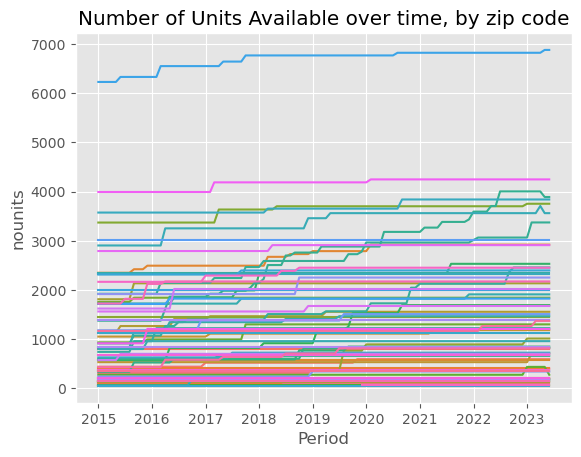

In [70]:
sns.lineplot(data=mf_occ_cle, x='Period', y='nounits', hue='zipcode', legend=False)
plt.title('Number of Units Available over time, by zip code')
plt.show()

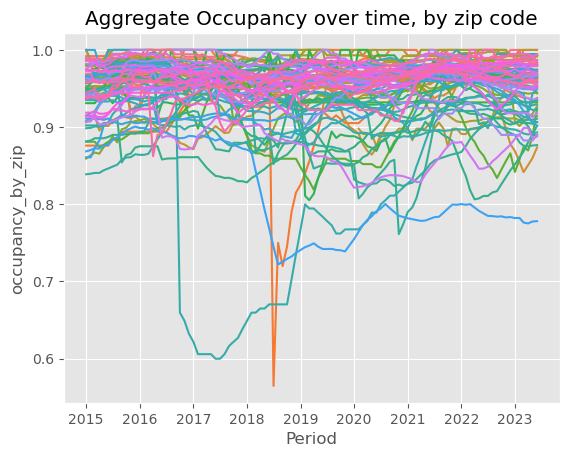

In [71]:
sns.lineplot(data=mf_occ_cle, x='Period', y='occupancy_by_zip', hue='zipcode', legend=False)
plt.title('Aggregate Occupancy over time, by zip code')
plt.show()

In [57]:
all_cle_zips = ['44080', '44065', '44121', '44145', '44134', '44859', '44203', '44141', '44117', '44202', '44113', '44851', '44055', '44094', '44114', '44045', '44274', '44064', '44026', '44149', '44133', '44130', '44131', '44109', '44125', '44119', '44491', '44146', '44104', '44023', '44077', '44095', '44060', '44074', '44254', '44089', '44054', '44057', '44022', '44099', '44062', '44118', '44129', '44107', '44147', '44126', '44112', '44132', '44231', '44889', '44256', '44281', '44270', '44028', '44280', '44215', '44880', '44040', '44049', '44041', '44046', '44139', '44116', '44108', '44024', '44086', '44136', '44138', '44124', '44333', '44135', '44035', '44039', '44144', '44143', '44137', '44092', '44044', '44127', '44214', '44012', '44011', '44072', '44106', '44101', '44217', '44234', '44111', '44105', '44110', '44001', '44275', '44021', '44122', '44070', '44120', '44017', '44102', '44128', '44103', '44052', '44253', '44251', '44235', '44140', '44287', '44321', '44230', '44142', '44123', '44090', '44053', '44273', '44212', '44081', '44050', '44115', '44233']
all_mfr_zips = ['44001', '44011', '44012', '44017', '44021', '44022', '44024', '44035', '44039', '44044', '44052', '44053', '44054', '44055', '44060', '44062', '44070', '44074', '44077', '44090', '44092', '44094', '44095', '44102', '44103', '44104', '44105', '44106', '44107', '44109', '44110', '44111', '44112', '44113', '44114', '44115', '44116', '44117', '44118', '44119', '44120', '44121', '44122', '44123', '44124', '44125', '44126', '44127', '44128', '44129', '44130', '44132', '44133', '44134', '44135', '44136', '44137', '44138', '44139', '44141', '44142', '44143', '44144', '44145', '44146', '44147', '44149', '44202', '44203', '44212', '44254', '44256', '44280', '44281', '44321', '44333']
final_zips = ['44001', '44011', '44012', '44017', '44021', '44022', '44024', '44035', '44039', '44053', '44054', '44060', '44070', '44077', '44090', '44092', '44094', '44095', '44102', '44103', '44105', '44106', '44107', '44110', '44111', '44112', '44113', '44114', '44115', '44116', '44117', '44118', '44120', '44121', '44122', '44123', '44124', '44125', '44126', '44128', '44129', '44130', '44132', '44133', '44134', '44135', '44136', '44138', '44139', '44141', '44142', '44143', '44144', '44145', '44146', '44147', '44202', '44203', '44212', '44256', '44281', '44321', '44333']

In [58]:
sfr_only = list(set(all_cle_zips) - set(all_mfr_zips))
mfr_incomplete = list(set(all_mfr_zips) - set(final_zips))

In [59]:
print(len(sfr_only))
print(len(mfr_incomplete))
print(len(final_zips))
print(len(all_cle_zips))

42
13
63
118


In [60]:
map_df = pd.DataFrame({'census_zcta5_geoid': all_cle_zips})

In [61]:
def category(zipcode):
    if zipcode in sfr_only:
        return 'SFR Only'
    elif zipcode in mfr_incomplete:
        return 'MFR Incomplete'
    elif zipcode in final_zips:
        return 'MFR Complete'
    else:
        return 'AAA'

In [62]:
def color(zipcode):
    if zipcode in sfr_only:
        return '#D55E00'
    elif zipcode in mfr_incomplete:
        return '#D55E00'
    elif zipcode in final_zips:
        return '#0072B2'

In [63]:
def opacity(zipcode):
    if zipcode in sfr_only:
        return 0.2
    elif zipcode in mfr_incomplete:
        return 0.2
    elif zipcode in final_zips:
        return 0.9

In [64]:
map_df['category'] = map_df['census_zcta5_geoid'].apply(category)
map_df['color'] = map_df['census_zcta5_geoid'].apply(color)
map_df['opacity'] = map_df['census_zcta5_geoid'].apply(opacity)

map_df.sort_values(by='category')

,census_zcta5_geoid,category,color,opacity
43,44107,MFR Complete,#0072B2,0.9
94,44070,MFR Complete,#0072B2,0.9
95,44120,MFR Complete,#0072B2,0.9
116,44115,MFR Complete,#0072B2,0.9
96,44017,MFR Complete,#0072B2,0.9
...,...,...,...,...
79,44214,SFR Only,#D55E00,0.2
82,44072,SFR Only,#D55E00,0.2
84,44101,SFR Only,#D55E00,0.2
86,44234,SFR Only,#D55E00,0.2


In [65]:
cbsa_map = cbsa[['census_zcta5_geoid', 'census_zcta5_lat', 'census_zcta5_lon']].copy()
cbsa_map = cbsa_map.drop_duplicates()

In [66]:
map_df_final = map_df.merge(cbsa_map, on='census_zcta5_geoid', how='left').dropna()

In [67]:
map_df_final

,census_zcta5_geoid,category,color,opacity,census_zcta5_lat,census_zcta5_lon
1,44065,SFR Only,#D55E00,0.2,41.454775,-81.229180
2,44121,MFR Complete,#0072B2,0.9,41.526243,-81.532433
3,44145,MFR Complete,#0072B2,0.9,41.449531,-81.930162
4,44134,MFR Complete,#0072B2,0.9,41.383410,-81.702612
5,44859,SFR Only,#D55E00,0.2,41.021963,-82.330724
...,...,...,...,...,...,...
113,44212,MFR Complete,#0072B2,0.9,41.244488,-81.828842
114,44081,SFR Only,#D55E00,0.2,41.763939,-81.143104
115,44050,SFR Only,#D55E00,0.2,41.248733,-82.128200
116,44115,MFR Complete,#0072B2,0.9,41.493539,-81.671188


In [68]:
# create map
m_ = folium.Map(width=1500, height=1500, location=[20,25], tiles="https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png",\
                attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>', zoom_start=2)

# add circles to the map
for i in range(0,len(map_df_final)):
    folium.Circle(
        location=[map_df_final.iloc[i]['census_zcta5_lat'], map_df_final.iloc[i]['census_zcta5_lon']],
        popup=f'{map_df_final.iloc[i]["census_zcta5_geoid"]}: {map_df_final.iloc[i]["category"]}',
        radius=1500,
        color='black',
        weight=0.5,
        fill=True,
        fill_color=map_df_final.iloc[i]['color'],
        fill_opacity=map_df_final.iloc[i]["opacity"]
    ).add_to(m_)

# save as HTML file and preview    
m_.save('m_.html')
m_